## M345SC 2019 Lab 4 Solution

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [37]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
            print("Q=",Q)
    return L2,L3

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortes path between nodes 0 and 1 is 0->2->3->1. 

In [38]:
#New function here
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #paths
    
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s]=[s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                L4[v].extend(L4[x]) #Add path to node x and node v to path
                L4[v].append(v)     #for node v
            print("v=",v)
            print("Q=",Q)
    return L2,L3,L4

2. Test your function with a modestly-sized Barabasi-Albert graph and verify that it computes shortest-paths correctly:

Populating the interactive namespace from numpy and matplotlib
***x= 0  ***
v= 3
Q= [3]
v= 4
Q= [3, 4]
v= 7
Q= [3, 4, 7]
***x= 3  ***
v= 0
Q= [4, 7]
v= 1
Q= [4, 7, 1]
v= 2
Q= [4, 7, 1, 2]
v= 4
Q= [4, 7, 1, 2]
v= 5
Q= [4, 7, 1, 2, 5]
v= 6
Q= [4, 7, 1, 2, 5, 6]
v= 9
Q= [4, 7, 1, 2, 5, 6, 9]
***x= 4  ***
v= 0
Q= [7, 1, 2, 5, 6, 9]
v= 2
Q= [7, 1, 2, 5, 6, 9]
v= 3
Q= [7, 1, 2, 5, 6, 9]
v= 5
Q= [7, 1, 2, 5, 6, 9]
v= 6
Q= [7, 1, 2, 5, 6, 9]
v= 7
Q= [7, 1, 2, 5, 6, 9]
v= 8
Q= [7, 1, 2, 5, 6, 9, 8]
***x= 7  ***
v= 0
Q= [1, 2, 5, 6, 9, 8]
v= 2
Q= [1, 2, 5, 6, 9, 8]
v= 4
Q= [1, 2, 5, 6, 9, 8]
***x= 1  ***
v= 3
Q= [2, 5, 6, 9, 8]
***x= 2  ***
v= 3
Q= [5, 6, 9, 8]
v= 4
Q= [5, 6, 9, 8]
v= 5
Q= [5, 6, 9, 8]
v= 6
Q= [5, 6, 9, 8]
v= 7
Q= [5, 6, 9, 8]
v= 8
Q= [5, 6, 9, 8]
***x= 5  ***
v= 2
Q= [6, 9, 8]
v= 3
Q= [6, 9, 8]
v= 4
Q= [6, 9, 8]
v= 9
Q= [6, 9, 8]
***x= 6  ***
v= 2
Q= [9, 8]
v= 3
Q= [9, 8]
v= 4
Q= [9, 8]
v= 8
Q= [9, 8]
v= 9
Q= [9, 8]
***x= 9  ***
v= 3
Q= [8]
v= 5
Q= [8]
v= 6
Q= [8]
***x= 8  ***


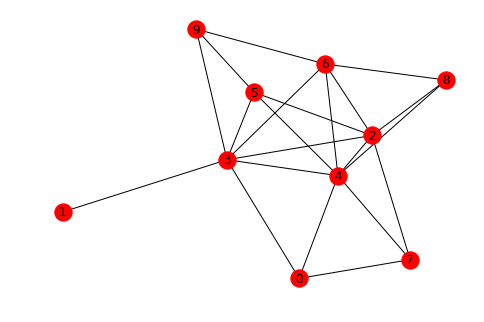

In [35]:
#Add code here
%pylab inline
G = nx.barabasi_albert_graph(10,3)
nx.draw(G,with_labels=True)
L2,L3,L4 = bfs(G,0)
print("L4=",L4)

In [36]:
L4

[[0],
 [0, 3, 1],
 [0, 3, 2],
 [0, 3],
 [0, 4],
 [0, 3, 5],
 [0, 3, 6],
 [0, 7],
 [0, 4, 8],
 [0, 3, 9]]

### Task 2: Code performance and memory

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

In [3]:
import numpy as np
from time import time
nlist=[8000]
a=0
for n in nlist:
    
    #Iterate across rows
    A = np.random.rand(n,n)
    t1 = time()
    
    for i in range(n):
        x = np.std(A[:,i])
  
    t2 = time()
    dt0 = t2-t1

    #Iterate across columns
    A = np.random.rand(n,n)
    t1 = time()

    for i in range(n):
        x = np.std(A[i,:])
        
    t2 = time()
    dt1 = t2-t1
    print("n=",n,'dt0=',dt0,'dt1=',dt1,'dt1/dt0=',dt1/dt0) 
    
    

n= 8000 dt0= 5.5826356410980225 dt1= 0.5229508876800537 dt1/dt0= 0.09367455110812085


**Ans:** Iterating across rows (dt1) should be much faster for large n

2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [4]:
import numpy as np
from time import time
nlist=[8000]
a=0
for n in nlist:
    A = np.random.rand(n,n)
    t1 = time()
    x = np.std(A,axis=0)  #mean of each column
    t2 = time()
    dt0 = t2-t1
    A = np.random.rand(n,n) 
    t1 = time()
    x = np.std(A,axis=1)  #mean of each row
    t2 = time()
    dt1 = t2-t1
    print("n=",n,'dt0=',dt0,'dt1=',dt1,'ratio=',dt1/dt0) 
    #Answer: dt0 should be pretty close to dt0 for even large n
    #and should be similar to dt1 in the previous example
    

n= 8000 dt0= 0.6117470264434814 dt1= 0.515902042388916 ratio= 0.8433257867851354


**Ans:** The time difference seems to go away when the built-in method is used. dt0 should be pretty close to dt1 for even large n and should be similar to dt1 in 1).